<a href="https://colab.research.google.com/github/youngsoopar/Aiffel_practice/blob/main/CV%20starting%20with%20deep%20learning/CV_starting_with_deep_learning_Chapter_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from IPython.display import Image
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


# Object Detection 모델
<br>
<br>

## 1. Object Detection 모델이란?
  - 말 그대로 물체를 감지하는 모델
  - Object Detection는 Single object 와 Multiple objects로 구분

  ### Single Object
    - Image Classification: 하나의 대상의 label이 무엇인지 분류

    - Localization: 대상의 위치를 가장 적절하게 지정하는 bounding box를 탐색
      - Bounding box : 이미지 물체 위치를 사각형으로 정의 및 꼭짓점 좌표로 표현하는 방식
<br>
<br>

  ### Multiple Object
    - Object Detection: 여러 대상을 여러 Bbox로 찾아 위치를 가장 적절하게 지정하는 동시에 각 Bbox의 대상을 판별

    - Segmentation: 픽셀 단위별로 detection을 수행 (특정 픽셀이 속한 대상 판별) Segmentation은 Semantic Segmentation와 Instance Segmentation로 구분





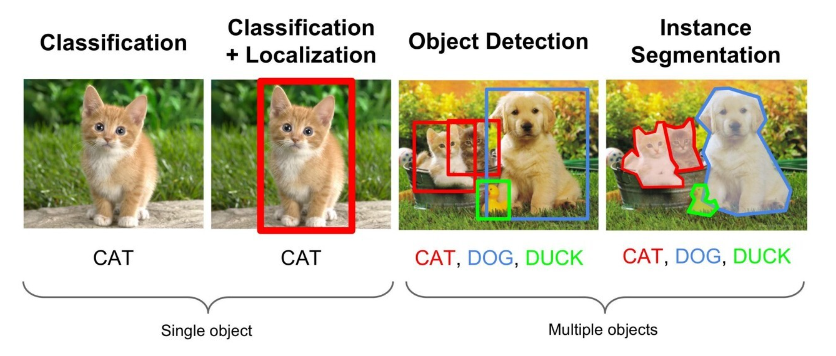

In [3]:
Image('/gdrive/My Drive/Deep learning/CV starting with deep learning/Object Detection_Single,multi.png')

## 2. Object Detection 모델의 발전 과정

  - 일반적인 CNN 모델은 feature를 잘찾아내지만 대상의 위치를 잡는데는 어려움을 겪음

  - 2014년 AlexNet이 나오면서 Object Detection 모델은 2가지로 나뉘게 됨
  - One - Stage 또는 Two - Stage Detector로 구분
  - 기존에는 object detection을 위해 sliding window방식을 사용함.
  - 이런 점을 해결하기 위해 **region proposal** 이 등장
    - Region proposal : 물체가 있을 것같은 영역을 뽑아주는 작업

<br>

  - ### Two - Stage Detector (R-CNN 계열 모델)
    - region proposal 진행(1st) 분류 및 Bbox 작업(2nd) 의 2가지 stage로 나누어 작업
    - Region proposal 진행하면서 이미지 내 대상이 있을 법한 영역인 ROI(Region of Interest)를 찾아낸다.
    - 찾아낸 ROI 안에 이미지를 분류한다.
    - 두 단계로 나뉘어 느리지만, 정확도가 비교적 높음


  - ### One - Stage Detector (Yolo 계열 모델)
    - Region proposal과 Classification을 동시에 수행
    - ROI를 찾는대신 이미지 전체를 대상으로 분류
    - Yolo v1의 경우 전체를 일정 그리드로 분할 후 각 셀별 Classification 진행
    - 연산이 빨라 realtime processing 작업(자율주행) 에 이용되나 정확도가 비교적 낮음

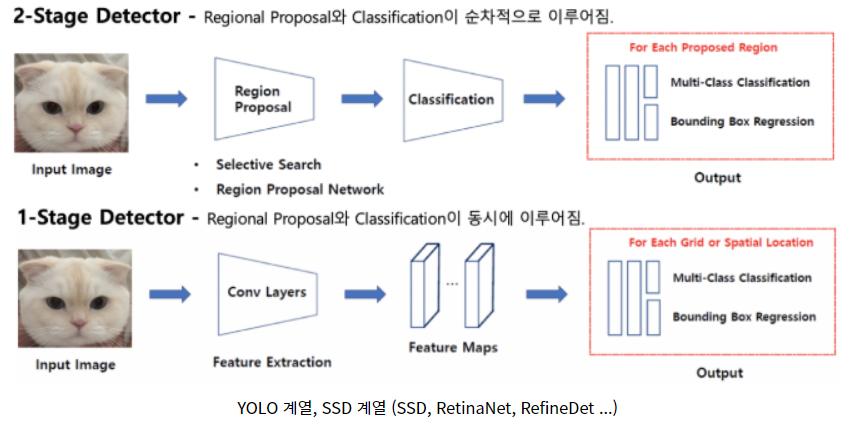

In [6]:
Image('/gdrive/My Drive/Deep learning/CV starting with deep learning/stage detector.png', height = 400, width = 800)

## 3. R-CNN

### 3.1 R-CNN 모델 동작 순서
  1. Region Proposal: 입력 이미지에 selective search 알고리즘 적용, 객체가 있을 만한 RoI 후보 2천 개 추출
  2. Resize: 추출된 RoI의 2천 개의 크기를 227x227로 변형(동일 사이즈로 변형하기 때문에 이미지 왜곡)
  3. 이미 학습된 CNN 구조를 통해서 4,096차원의 특징 벡터 추출
  4. 각 객체별로 학습된 SVM classifier를 이용하여 추출된 특징 벡터를 분류
  5. Bounding box regression으로 적절한 객체의 경계(B box)를 설정
  (Non-maximum suppresion 활용)

  

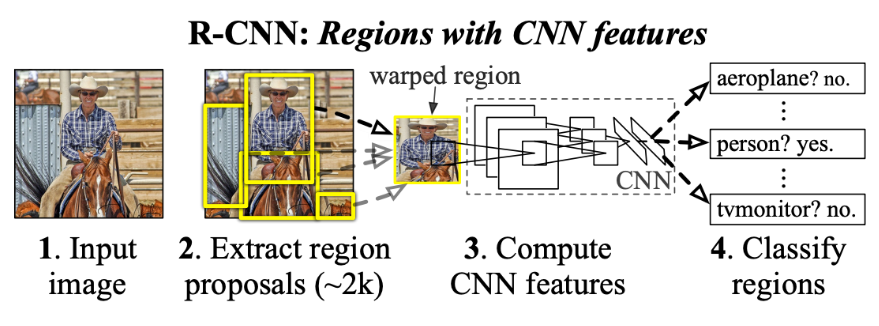

In [8]:
Image('/gdrive/My Drive/Deep learning/CV starting with deep learning/R-CNN.png')

### 3.2 R-CNN 동작 과정 세부설명 및 관련 개념
- #### selective search
    - 색, 무늬 크기, 형태를 바탕으로 주변 픽셀 간 유사도를 계산
    - 계산한 유사도를 바탕으로 segmentation 후, 작은 segment들을 묶어가며 최종 후보 탐색
    - Selective Search의 초기 segmentation은 매우 세밀한 영역까지 segmentation 하는 over-segmentation을 하며 유사도가 비슷한 segment들을 반복적으로 묶음

- 이미 학습된 CNN : 이미지넷 데이터(ILSVRC2012 classification)로 미리 학습된 CNN 모델에 fine tune함. (Tranfer Learning)
- SVM Classifier : 라벨 or 종속변수가 있는 데이터를 학습한 뒤 예측을 함.(일반화를 위해)
  - https://zephyrus1111.tistory.com/211
  
- Iou : 교집합 / 합집합
- NMS : 최선의 B box 만을 구하기 위함.
- mAP : mAP는 여러 object들의 AP를 평균값을 의미
  - AP :  Precision-Recall Curve의 아래 부분 면적
    - PRC : thresh(임계값) 변화의 따른 정확도와 재현율의 변화 곡선
      - 정확도(Precision) : TP / TP + FP = TP / all detection
      - 재현율(Recall) : TP / TP + FN = TP / all ground truth
      - 검출한 것에 대해 알고리즘이 얼마나 정확하다 생각하는 값(Confidence)들 중 기준을 세워 PRC를 만듬
      - https://ctkim.tistory.com/entry/mAPMean-Average-Precision-%EC%A0%95%EB%A6%AC

- Bounding box regression : NMS을 통해 구해진 B box를 Ground truth box에 가깝게 만드는 회귀 모델
  - https://yeomko.tistory.com/13
  - https://lilianweng.github.io/posts/2017-12-31-object-recognition-part-3/


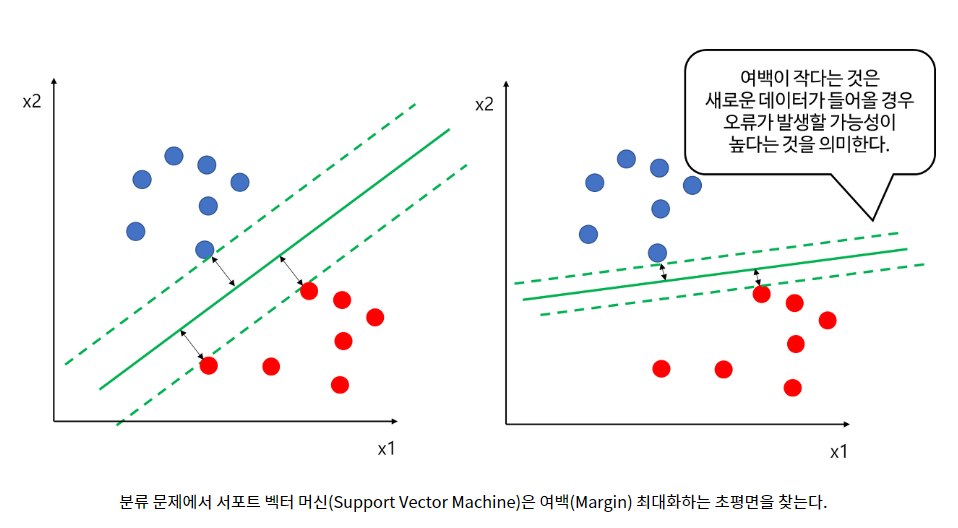

In [18]:
Image('/gdrive/My Drive/Deep learning/CV starting with deep learning/SVM.png', height = 400)

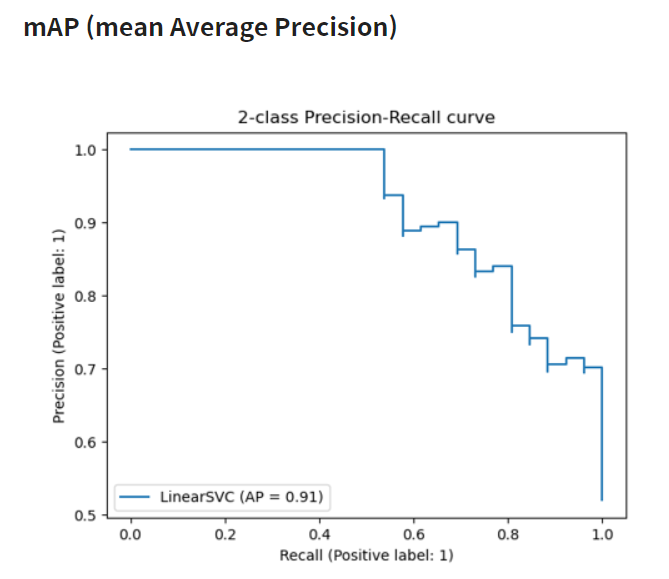

In [19]:
Image('/gdrive/My Drive/Deep learning/CV starting with deep learning/mAP.png', height = 400)